<a href="https://colab.research.google.com/github/Tanveer132/Classfication-Types-in-Machine-Learning/blob/main/FST_Practice_All_Classification(Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All classification Algorithm using pipeline

data - iris data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##Define functions to get best fitting model

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Naive Bayes":GaussianNB(),
        "SVM":SVC(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

In [28]:
def find_best_model(x,y,flag):
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
  acc={}
  for name,model in models.items():
    #create pipeline
    if flag==0:
      model=Pipeline([(name,model)])
    elif flag==1:
      model=Pipeline([("scaler",StandardScaler()),
                      (name,model)])
      
    #fit model
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    print("Accuracy for ",name," is - ",accuracy)
    acc[name]=accuracy

  return acc



In [25]:
def best_acc(acc):
  high=0
  model=""
  for name,acc in acc.items():
    if high < acc:
      high = acc
      model=name

  print(model," is giving highest accuracy = ", high)

In [33]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [35]:
acc=find_best_model(x,y,1)

Accuracy for  Logistic Regression  is -  0.8246753246753247
Accuracy for  Decision Tree  is -  0.7597402597402597
Accuracy for  Naive Bayes  is -  0.7922077922077922
Accuracy for  SVM  is -  0.7922077922077922
Accuracy for  KNN  is -  0.7987012987012987
Accuracy for  Random Forest  is -  0.8051948051948052


In [36]:
best_acc(acc)

Logistic Regression  is giving highest accuracy =  0.8246753246753247


##Find best parameters for best fitted model

In [40]:
# help(LogisticRegression)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


In [38]:
# estimator---> model to be used
model=LogisticRegression()

# param_grid--> solver,panalty,c
param={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
      "penalty":['l1', 'l2', 'elasticnet', 'none'],
      "multi_class" : ['auto', 'ovr', 'multinomial'],
      "C":[100,10,1,0.1,0.01,0.001]}

# cv(cross validator)-->kfold
#n_repeats=3/5/10, n_splits is always 10
kfold=RepeatedStratifiedKFold(n_repeats=3,n_splits=10,random_state=1)


In [41]:
#Provide-->estimator=model,grid=parameters extracted,cv=cross validator,scoring='accuracy'
grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=kfold,scoring='accuracy')
result=grid_cv.fit(xtrain,ytrain)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWa

In [42]:
print(result.best_score_)
print(result.best_params_)

0.7654327516305307
{'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


In [43]:
#Tunned parameters are:
# {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

model=LogisticRegression(C= 1, multi_class= 'multinomial', penalty= 'l2', solver= 'lbfgs')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy : 0.8246753246753247
Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



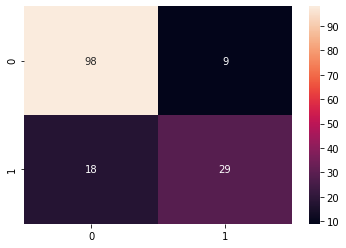

In [44]:
print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)